# How to analyze your friends network with Social Network Analysis? MASNA workshop 26.05.2023

Speaker: 

*[Lika Kapustina](https://www.hse.ru/org/persons/305084525)*, 

Research assistant at International Laboratory of Applied Network Analysis HSE,

lvkapustina@edu.hse.ru




Good evening! Today we are going to talk about network analysis and immediately about how it can be used to analyse data about human interactions. We will analyse my friends' network data (for example), but you can use the code from this .ipynb notebook and do the same for your VK page :)

**Today we will discuss**:
1. Social networks and what data can be used to build social networks;
2. Web-scraping methods for collecting data from social network "Vkontakte" (VK) via VK APi using Python;
3. How to create network object: `networkx` and Gephi Lite.

## 1. Social networks and what data can be used to build social networks

It is worth saying a few things: firstly, **networks are different**: we can talk about networks of human relations, we can talk about networks of trade, networks in biology, etc. Today we are going to talk about networks of human relations. Specifically - about social media networks. They are studied by **social network analysis (SNA)**.

**What are some examples of "social" networks?**

1. **Florentine Families (14th - 15th centuries)**.Historician John Padgett reconstructed the relationships between the famous families of 14th- and 15th-century Florence, using historical documents. The dataset created by the historian included information on marriages between families and on trade relations between families. His data were subsequently processed by Breiger & Pattison (1986) and these data are now very often used as datasets to train network analysis skills.
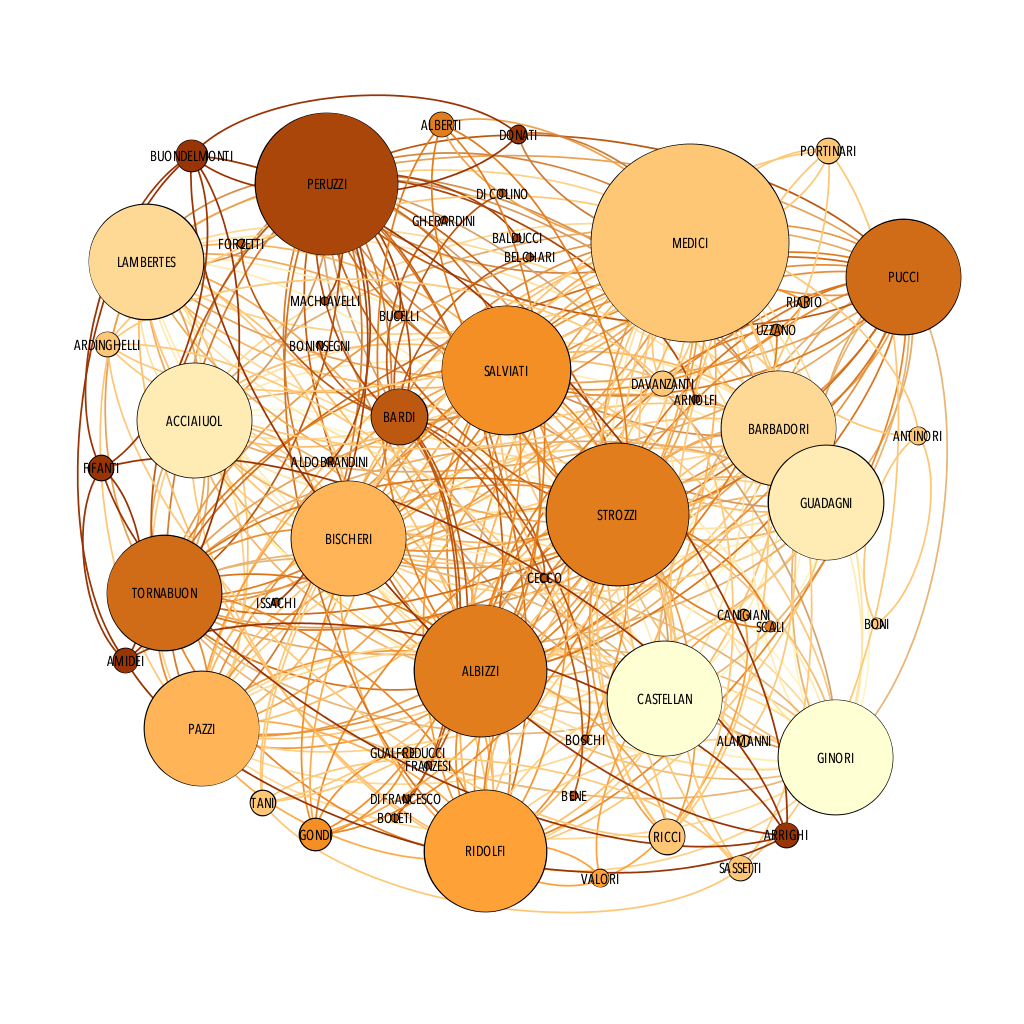

2. **Romantic relations in Jefferson High School**

Another classical example – romantic relations in Jefferson High School. Here we can see the structure of the  romantic and sexual network in a population of over 800 adolescents residing in a midsized town in the midwestern United States, Jefferson High School. Precise images and measures of network structure are derived from reports of relationships that occurred over a period of 18 months between 1993 and 1995. *(Bearmen, Moody & Stovel, 2004).*
![network2](network2.jpg)

3. **Some social media network**

This is a simple example of social media accounts network based on Twitter data. We will make something similiar but on Vkontakte data :)

![](twitter_network.png)

These are classic sets of ready-made and pre-processed data from which a network can be created. If you join the MASNA programme, you will often hear about a term such as the adjacency matrix. Using an **adjacency matrix**, you can create network data. Let me explain with an example:

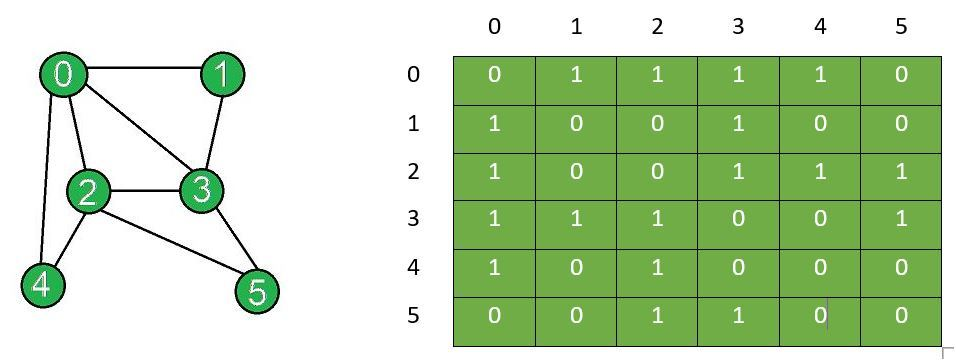

**Adjacency matrix** is a matrix where both rows and columns relate to specific network nodes. If there is a value at the intersection of a particular column and row, then in this case, there is an edge between the objects. 

**Example**: Node "0" has a value of 1 on its row in column "4". This means that there is an edge between node 0 and node 4.

In the data example, our network is symmetric (if A has an edge to B, then B has an edge to A), and the relationship between the nodes takes only 2 values: 0 (no connection) and 1 (connection). But there may be other examples of adjacency matrix from which networks are created.


However, in addition to standard data sets, we can also use data that we have collected ourselves. For example, data about our friendships and friendships of our friends in social networks. We will talk about how to do this as an example in the next section :)

## 2. Web-scraping methods for collecting data from social network "Vkontakte"

In this section we will talk about how to collect data using the VK API and the different terms that arise in connection with these processes. What we are going to do next is generally related to **Web-Scraping** technologies: it is a set of techniques by which you can, using programming languages, get data from open sources: social networks, websites, in general - web pages.

**For example, what can we gather using web-scraping?**
1. Data about the products on the online shop site;
2. Election results at different territorial election commissions on the Central Electoral Comission website;
3. Open data from social media pages.

Social media data is just what we need :) Let's talk more about that.



**How can we get data from social media?**

How can we get data from social media? The short answer is through an API. What is an API?

**API** (if we try to formulate it short and quickly) - it is a set of methods, provided by the source site itself (social media, for example), through which we can retrieve data from the service with specific requests.

For example: Twitter has its own API, HH.ru has an API, and so russian social media ["Vkontakte"](https://vk.com/feed) has its own API which is called "VK API".

**How to use VKontake API?**

First of all, VKontakte has a special page for [VK API methods](https://dev.vk.com/reference). There you can read about all the methods and data types you can get via VK API.

Next, you need to register your app and create token for data extraction. I will not stop on this step for long because it is not workshop on web-scraping via VK API specifically, but here you can find [short instruction (on russian)](https://dvmn.org/encyclopedia/qna/63/kak-poluchit-token-polzovatelja-dlja-vkontakte/).

Let's just note the following: you need to spend 5-10 minutes executing these instructions, and as a result you will have a certain string - it's called a **token** - with which you will access the service's data via the API. Token for the VK API looks something like this: 

```
vk1.533bacf01e1165b57531ad114461ae8736d6506a3ууу1e2texpires_in=864000id=1111111
```



**Now let's get to the code!** I will demonstrate how to formulate requests to the VKontakte service and get data from it by getting your VK token.

In [68]:
# let's import some packages
import requests
import numpy as np
from datetime import datetime
from time import sleep
import pandas as pd
import tqdm
import re
import math
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# if you didnt install one of these packages, use code below and then code upper one more time
!pip install nameofpackage

In [2]:
# if you didn't save your token to txt file, you need to do this
with open('token.txt', 'w') as file:
    file.write('...')

In [69]:
# read id
with open('id.txt') as file:
    myid = file.read()

# VK API version
version = '5.131'

# read token from txt file (for security purposes)
with open('token.txt') as file:
    token = file.read()

For our main purpose - creating network of friends via VK API, we will use method **Friends.get**. Documentation on VK API can be find [here](https://dev.vk.com/method/friends.get).

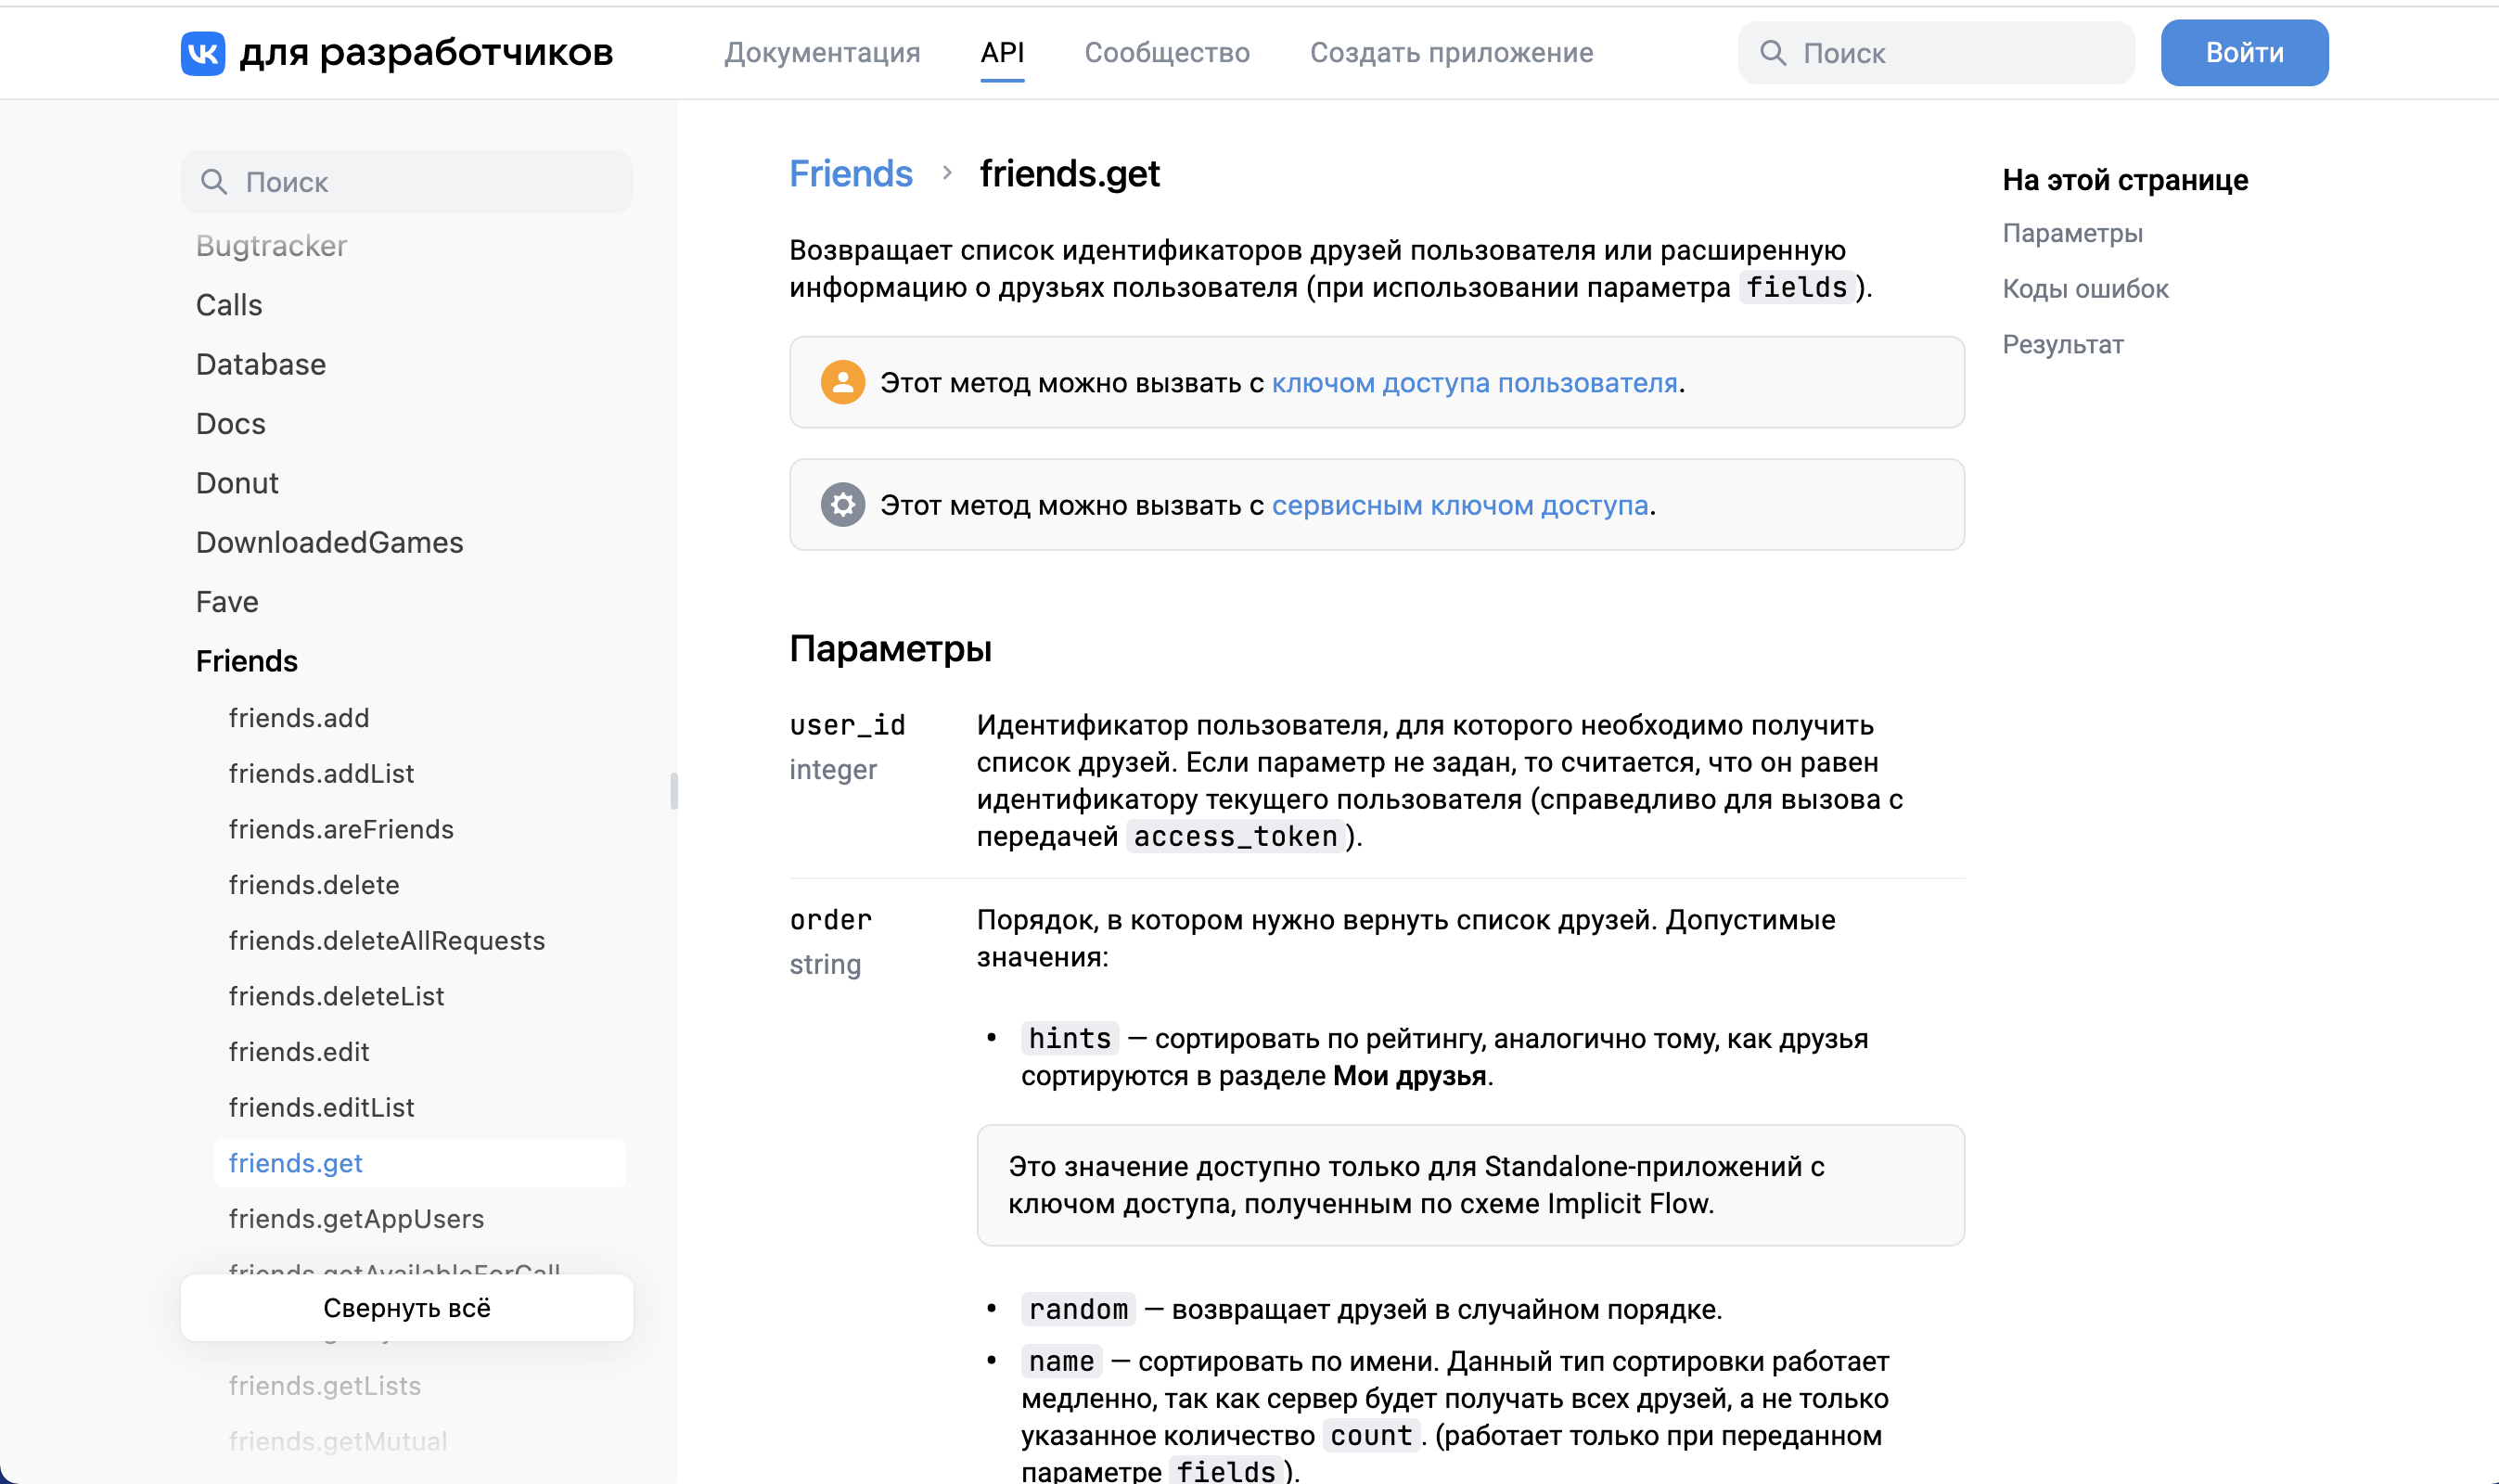

In [65]:
method = 'friends.get' # our method - choosen by VK API Documentation (with specific purpose - to get friends data)
user_id = '441721976' # VK user id. In this example - my account id
parameters = 'count=5000' # max number of friends data on which we want to obtain

# a more or less universal formula for querying the VK API:
url = 'https://api.vk.com/method/' + method +'?' + parameters + '&v=' + version + '&access_token=' + token + '&user_id=' + user_id
response = requests.get(url)
response.json() # what we have here? object with ids of 593 of all of my friends :)

{'response': {'count': 593,
  'items': [130896,
   709743,
   2416234,
   4144285,
   4762997,
   6690917,
   8734733,
   10741524,
   12325849,
   12900237,
   15707191,
   16790170,
   17327081,
   21634006,
   29567553,
   32525177,
   33626945,
   33901553,
   34414484,
   38031682,
   38354997,
   38584695,
   39422426,
   39613300,
   40294783,
   41437413,
   42187308,
   43582908,
   43907854,
   46892939,
   47116386,
   47402039,
   48529189,
   48667355,
   48905537,
   49235357,
   50302822,
   50733772,
   50739889,
   50945659,
   50966702,
   52442885,
   52925030,
   53414043,
   53809989,
   53896364,
   54780186,
   56725912,
   57039283,
   58345612,
   58593114,
   63653384,
   64471095,
   64564860,
   65016047,
   66659844,
   66865352,
   69933302,
   70569001,
   73212673,
   74023038,
   77140301,
   80675969,
   81091156,
   81742295,
   81955610,
   83401019,
   83844057,
   84071057,
   84573350,
   84574644,
   84659882,
   84912968,
   86226248,
   8745828

But what if we want to take an additional information, not only my friends ids, but maybe info from their profiles?

Let's scroll down documentation and look at the `fields` field: we need to specify some parameters.
For example:
* `bdate`;
* `can_post`;
* `can_see_all_posts`, 
* etc..

And in all cases with VK API we need to use `&extended=1` in parameters if we want to get some additional data.
![friends.get2](friends.get2.png)



In [66]:
# But what if we want to take an additional information, not only my friends ids?

method = 'friends.get' # our method - choosen by VK API Documentation (with specific purpose - to get friends data)
user_id = '441721976' # VK user id. In this example - my account id
# our parameters!
# first of all, we need &extended=1 in our parameters, then - &fields=...
# here we will collect data on birthdays, cities, countries, sex and screen_name of profile of my friends
parameters = 'count=5000' + '&extended=1' + '&fields=bdate,city,country,sex,domain' + '&name_case=nom' # берем максимум - 5000 друзей

url = 'https://api.vk.com/method/' + method +'?' + parameters + '&v=' + version + '&access_token=' + token + '&user_id=' + str(user_id)
response = requests.get(url)
response = response.json()
response # and also we will have some basic information - first_name, last_name, is_closed.

{'response': {'count': 593,
  'items': [{'id': 130896,
    'domain': 'sydney',
    'bdate': '29.9.1988',
    'city': {'id': 1, 'title': 'Москва'},
    'country': {'id': 1, 'title': 'Россия'},
    'track_code': 'f8fecfab4F9HJ2VaL5YrzImuZ3bWpFEdS0w3e5DvfvsE42zlceuBPHUZMVkom3HMjwDjzofTRW8iKVk',
    'sex': 2,
    'first_name': 'Егор',
    'last_name': 'Юрескул',
    'can_access_closed': True,
    'is_closed': False},
   {'id': 709743,
    'domain': 'mariabystrova',
    'bdate': '9.9',
    'city': {'id': 1, 'title': 'Москва'},
    'country': {'id': 1, 'title': 'Россия'},
    'track_code': 'df29e4953GHgXQs4ksBWJR6zdWjMsZF_VmtIUCN3SoZj8t_0zE29AtVsDTHIxFQuGR3x0J3GhQ0_DiY',
    'sex': 1,
    'first_name': 'Мария',
    'last_name': 'Быстрова',
    'can_access_closed': True,
    'is_closed': False},
   {'id': 2416234,
    'domain': 'dmitry.zemtsov',
    'bdate': '9.8.1984',
    'city': {'id': 1, 'title': 'Москва'},
    'country': {'id': 1, 'title': 'Россия'},
    'track_code': '8436d31dLJXggINBtW

In [67]:
# what objects can we call from response?
response['response'] # all response object (json format)
response['response']['items'][0] # one object - data on one friend

{'id': 130896,
 'domain': 'sydney',
 'bdate': '29.9.1988',
 'city': {'id': 1, 'title': 'Москва'},
 'country': {'id': 1, 'title': 'Россия'},
 'track_code': 'f8fecfab4F9HJ2VaL5YrzImuZ3bWpFEdS0w3e5DvfvsE42zlceuBPHUZMVkom3HMjwDjzofTRW8iKVk',
 'sex': 2,
 'first_name': 'Егор',
 'last_name': 'Юрескул',
 'can_access_closed': True,
 'is_closed': False}

In this masterclass we won't go into great detail about the specifics of VK API queries and how you can write usable functions based on them, so I'll just use the code I wrote earlier and the data I received. 

If you want to experiment and try to build a network of friends based on data from your VKontakte page on your own, just use my code (after getting a VK token as instructed above). You need to run two cells below (and insert your vk page id), and in case of any problems you can contact me on my email lvkapustina@edu.hse.ru

In [49]:
def get_id_of_user_from_link(user_link, method='util.resolveScreeenName'):
    '''
    Функция get_id_of_user_from_link(user_link) принимает на вход ссылку на страницу пользователя ВКонтакте
    и возвращает его id.
    
    Args:
        :user_link: string - ссылка на пользователя;
    Returns:
        :user_id: string - id пользователя в виде строки
    Example:
        >>>> one_user_id = get_id_of_user_from_link('https://vk.com/lika.kapustina')
        >>>> one_user_id # 441721976
    '''

    screen_name = user_link.replace('https://vk.com/', '')

    # может быть такое, что ссылка на пользователя содержит id (vk.com/id777)
    if screen_name.startswith('id') == True and screen_name[2:].isdigit() == True:
        user_id = screen_name.replace('id', '')

    # если нет, нам нужно сделать запрос к ВК и получить id пользователя
    else:
        method_for_get_id = 'utils.resolveScreenName'
        parameters='screen_name=' + screen_name
        url = 'https://api.vk.com/method/' + method_for_get_id +'?'+ parameters + '&v=' + version + '&access_token=' + token
        response = requests.get(url)
        response = response.json()
        user_id = response['response']['object_id']
        
    # возвращаю id
    return user_id


def get_id_of_all_users_links(users_links, method='util.resolveScreeenName'):
    '''
    Функция get_ids_of_all_users_from_links(user_links) принимает на вход СПИСОК со ссылками на аккаунты пользователей,
    обращается внутри себя к методу `get_id_of_user_from_link(user_link)`,
    и возвращает СТРОКУ с id пользователей, записанных через строку.
    
    Args:
        :users_links: list - список с ссылками на пользователей;
    Returns:
        :users_ids_string: string - id пользователей, записанные через запятую в виде строки.
    Example:
        >>>> list_with_ids = get_id_of_all_users_links(['https://vk.com/lika.kapustina','https://vk.com/sdilov','https://vk.com/sofiagreseva'])
        >>>> list_with_ids
        
    '''
    users_ids_list = [] # создаем пустой список
    
    # идем по всему списку из ссылок
    for user_link in tqdm.tqdm(users_links):
        user_id = get_id_of_user_from_link(f'{user_link}') # получаем id пользователя
        users_ids_list.append(user_id)
        sleep(0.15) # небольшая пауза    
    
    users_ids_string = ','.join([str(i) for i in users_ids_list])
    
    return users_ids_string # возвращаем строку с id пользователей


def get_friends_of_user_only_ids(user_id, method='friends.get'):
    '''Функция get_friends_of_user_only_ids принимает на вход id пользователя ВКонтакте и возвращает строку, где через
    запятую перечислены id его друзей.
    
    Method: https://dev.vk.com/method/friends.get
    
    Args:
        :user_id: id пользователя ВКонтакте
    Returns:
        :friends_string: string с id друзей пользователя
    Example:
        >>>> limarenko_friends = get_friends_of_user('533710525')
        >>>> limarenko_friends # '626130,957188,1053362,2058801,3279648,4120747,5823842,8523846,11146055,11860274,25758390,169272036,171462727,182026369,196603818,322659228,462979979,520753933,538671248,550960397,550966564,551354669,551382456,551506228,578750417,606932606,616844912,633974128,660930698,665881497,670425420,689458339,703017057,703621379,708192084,708405503,710516910,710520153,710787650,711209497,711761122,711978083,711991565,712541914,712544833,712545388,713904031

    '''
    # осуществляем запрос
    parameters = 'count=5000' # берем максимум - 5000 друзей
    url = 'https://api.vk.com/method/' + method +'?' + parameters + '&v=' + version + '&access_token=' + token + '&user_id=' + user_id
    response = requests.get(url)
    one_data = response.text
    
    # обрабатываем данные
    first_index = one_data.index('[')
    second_index = one_data.index(']')
    friends_string = one_data[first_index+1:second_index]
    return friends_string # возвращаем строку с id друзей пользователя


def get_friends_of_user_full_info_in_df(user_id, type_of = 'id', method='friends.get'):
    '''Функция get_friends_of_user_info_df принимает на вход ИЛИ id пользователя ИЛИ ССЫЛКУ ВКонтакте 
    и возвращает датафрейм, где перечислены данные его друзей.
    
    Method: https://dev.vk.com/method/friends.get
    
    Args:
        :user_id: id пользователя ВКонтакте;
        :type_of: тип введенных данных (id пользователя ('id')/ссылка на него('link')).
        
    Returns:
        :pandas.DataFrame: датафрейм с информацией о друзьях пользователя.
        
        > friend_owner: id пользователя, информация о чьих друзьях указана далее.
        > user_id: id пользователя;
        > user_name: имя пользователя;
        > user_surname: фамилия пользователя;
        > user_sex: пол пользователя;
        > user_domain: короткое имя пользователя (нужно для ссылки);
        > user_bdate: дата рождения пользователя (иногда указывается без года);
        > user_city: город пользователя;
        > user_country: страна пользоваателя;
        > user_is_closed: закрыта ли страница пользователя;
        > user_link: сссылка на страницу пользователя.
        
    Example:
        >>>> limarenko_friends = get_friends_of_user('533710525')
        >>>> limarenko_friends # '626130,957188,1053362,2058801,3279648,4120747,5823842,8523846,11146055,11860274,25758390,169272036,171462727,182026369,196603818,322659228,462979979,520753933,538671248,550960397,550966564,551354669,551382456,551506228,578750417,606932606,616844912,633974128,660930698,665881497,670425420,689458339,703017057,703621379,708192084,708405503,710516910,710520153,710787650,711209497,711761122,711978083,711991565,712541914,712544833,712545388,713904031

    '''
    
    # если type_of = 'link' (то есть, не id), нужно получить id пользователя
    if type_of != 'id':
        link = user_id #значит, нам попалась ссылка и из нее нужно вынуть screen_name пользователя
        screen_name = link.replace('https://vk.com/', '')
        
        # может быть такое, что ссылка на полььзователя содержит id (vk.com/id777)
        if screen_name.startswith('id') == True and screen_name[2:].isdigit() == True:
            user_id = screen_name.replace('id', '')
        
        # если нет, нам нужно сделать запрос к ВК и получить id пользователя
        else:
            method_for_get_id = 'utils.resolveScreenName'
            parameters='screen_name=' + screen_name
            url = 'https://api.vk.com/method/' + method_for_get_id +'?'+ parameters + '&v=' + version + '&access_token=' + token
            response = requests.get(url)
            response = response.json()
            user_id = response['response']['object_id']

    
    # осуществляем запрос
    parameters = 'count=5000' + '&extended=1' + '&fields=bdate,city,country,sex,domain' + '&name_case=nom' # берем максимум - 5000 друзей
    url = 'https://api.vk.com/method/' + method +'?' + parameters + '&v=' + version + '&access_token=' + token + '&user_id=' + str(user_id)
    response = requests.get(url)
    response = response.json()
    
    # собираем данные для датафрейма
    number_of_friends = response['response']['count'] # число друзей у пользователя
    
    # список: чьи друзья в этом датафрейме?
    owner_of_friends = [user_id] * number_of_friends
    
    
    # общая информация, получается без необходимости использовать try-except.
    friends_ids = [response['response']['items'][i]['id'] for i in range(number_of_friends)]
    friends_first_names = [response['response']['items'][i]['first_name'] for i in range(number_of_friends)]
    friends_second_names = [response['response']['items'][i]['last_name'] for i in range(number_of_friends)]
    friends_sexs = [response['response']['items'][i]['sex'] for i in range(number_of_friends)]
    friends_is_closed = [response['response']['items'][i]['is_closed'] for i in range(number_of_friends)]


    
    # информация, которую нужно получать через try-except
    friends_domains = []
    for i in range(number_of_friends):
        try:
            one_domain = response['response']['items'][i]['domain']
        except:
            one_domain = str(response['response']['items'][i]['id'])
        friends_domains.append(one_domain)
        
        
    ## ссылки на пользвателей; если есть domain - значит, с domain; если нет - значит, с id
    friends_links = list(map(lambda x: f'https://vk.com/{x}' if x.isdigit() == False else \
                       f'https://vk.com/id{x}', friends_domains))

    friends_bdates = []
    for i in range(number_of_friends):
        try:
            one_bdates = response['response']['items'][i]['bdate']
        except:
            one_bdates = ''
        friends_bdates.append(one_bdates)


    friends_cities = []
    for i in range(number_of_friends):
        try:
            one_city = response['response']['items'][i]['city']['title']
        except:
            one_city = ''
        friends_cities.append(one_city)


    friends_countries = []
    for i in range(number_of_friends):
        try:
            one_country = response['response']['items'][i]['country']['title']
        except:
            one_country = ''
        friends_countries.append(one_country)
        
        
    # собираем датафрейм
    friends_df = pd.DataFrame({'friend_owner': owner_of_friends,
                               'user_id': friends_ids,
                              'user_name': friends_first_names,
                              'user_surname': friends_second_names,
                              'user_sex': friends_sexs,
                              'user_domain': friends_domains,
                              'user_bdate': friends_bdates,
                              'user_city': friends_cities,
                              'user_country': friends_countries,
                              'user_is_closed': friends_is_closed,
                              'user_link': friends_links})
    return friends_df


def get_friends_of_a_few_users_full_info_in_df(users_ids, type_of='id', method='friends.get'):
    '''Функция get_friends_of_a_few_users_info_df принимает на вход строку с id пользователей ВКонтакте,
    записанными через запятую, обращается к функции get_friends_of_user_full_info_in_df(user_id),
    и возвращает pandas.DataFrame с информацией о всех друзьях всех указанных пользователей
    
    Method: https://dev.vk.com/method/friends.get
    
    Args:
        :users_ids: string: ИЛИ id пользователей ВКонтакте ИЛИ ссылки на страницы пользователей ВКонтакте, записанных через запятую;
        :type_of: string: тип данных на входе (по умолчанию 'id' - id пользователей), либо 'link' - ссылки на пользователей.
    
    Returns:
        :pandas.DataFrame: датафрейм с информацией о друзьях пользователей, чьи id переданы функции.
        > friend_owner: id пользователя, информация о чьих друзьях указана далее.
        > user_id: id пользователя;
        > user_name: имя пользователя;
        > user_surname: фамилия пользователя;
        > user_sex: пол пользователя;
        > user_domain: короткое имя пользователя (нужно для ссылки);
        > user_bdate: дата рождения пользователя (иногда указывается без года);
        > user_city: город пользователя;
        > user_country: страна пользоваателя;
        > user_is_closed: закрыта ли страница пользователя;
        > user_link: сссылка на страницу пользователя.
        
    Example:
        >>>> some_friends = get_friends_of_a_few_users_full_info_in_df('48905537,12900237')
        >>>> some_friends
        
    Exmple:
        >>>> my_friends_list = ['https://vk.com/zzimablue',
                                   'https://vk.com/ksperov',
                                   'https://vk.com/sofiagreseva',
                                   'https://vk.com/sdilov',
                                   'https://vk.com/narepapoyan',
                                   'https://vk.com/kirillmuzyka']
        >>>> my_friends_string = ','.join(my_friends_list)
        >>>> friends_of_my_friends = get_friends_of_a_few_users_full_info_in_df(my_friends_string, type_of='link')
        >>>> friends_of_my_friends
        
        
    '''
    
    users_ids = users_ids.split(',')
    
    full_users_friends_data = pd.DataFrame()
    
    for user_id in tqdm.tqdm(users_ids):
        try:
            one_user_friends_data = get_friends_of_user_full_info_in_df(user_id,
                                                                       type_of = type_of)
            full_users_friends_data = pd.concat([full_users_friends_data, one_user_friends_data])
            sleep(0.4)
        except Exception as e:
            print(e)
    
    return full_users_friends_data

In [50]:
# use this code!
# only your data
vk_profile_link = '...'
friends_data = get_friends_of_user_full_info_in_df(vk_profile_link, type_of = 'link')
# friends of your friends data
my_friends_list = friends_data['user_link'].tolist()
my_friends_string = ','.join(my_friends_list)
friends_of_my_friends = get_friends_of_a_few_users_full_info_in_df(my_friends_string, type_of='link')
# some preparation
my_friends_ids = friends_data['user_id'].tolist()
my_friends_ids.append(friends_data['friend_owner'].unique()[0]) # добавляем в список себя
small_df = friends_of_my_friends[['user_id', 'user_name', 'user_surname']].drop_duplicates()
friends_of_my_friends = pd.merge(friends_of_my_friends, small_df, left_on='friend_owner', right_on='user_id')
friends_of_my_friends = friends_of_my_friends[['user_id_x', 'user_name_x', 'user_surname_x',
                      'user_id_y', 'user_name_y', 'user_surname_y']]
friends_of_my_friends['user_x'] = friends_of_my_friends['user_name_x'] + ' ' + friends_of_my_friends['user_surname_x']
friends_of_my_friends['user_y'] = friends_of_my_friends['user_name_y'] + ' ' + friends_of_my_friends['user_surname_y']
friends_of_my_friends = friends_of_my_friends[(friends_of_my_friends['user_id_x'].isin(my_friends_ids)) &\
                     friends_of_my_friends['user_id_y'].isin(my_friends_ids)]
friends_of_my_friends

,friend_owner,user_id,user_name,user_surname,user_sex,user_domain,user_bdate,user_city,user_country,user_is_closed,user_link
0,441721976,130896,Егор,Юрескул,2,sydney,29.9.1988,Москва,Россия,False,https://vk.com/sydney
1,441721976,709743,Мария,Быстрова,1,mariabystrova,9.9,Москва,Россия,False,https://vk.com/mariabystrova
2,441721976,2416234,Zemtsov,Dmitry,2,dmitry.zemtsov,9.8.1984,Москва,Россия,False,https://vk.com/dmitry.zemtsov
3,441721976,4144285,Марта,Измайлова,1,id4144285,29.5,Москва,Россия,False,https://vk.com/id4144285
4,441721976,4762997,Никита,Власов,2,id4762997,3.3.1985,Москва,Россия,False,https://vk.com/id4762997
...,...,...,...,...,...,...,...,...,...,...,...
588,441721976,689200024,DELETED,,2,id689200024,4.2.2002,,,False,https://vk.com/id689200024
589,441721976,690288246,Саша,Пожарская,1,iknoweveryonehasdreams,22.5.2001,,,False,https://vk.com/iknoweveryonehasdreams
590,441721976,693641278,Ayomide,Adedini,2,id693641278,9.8.1993,,,False,https://vk.com/id693641278
591,441721976,709104191,Саша,Волкова,1,y4vk_pv,10.9.2002,,,False,https://vk.com/y4vk_pv


In [70]:
# let's imagine that we just used functions above and get my friends data, so..
df = pd.read_excel('friends_of_my_friends.xlsx')
df # what do we have here? dataframe with my friends and friends of my friends
# user_x and user_y - two users that are friends
# why do we need not only data on my friends? because I want to know where are edges between my friends or not?

,Unnamed: 0,user_id_x,user_name_x,user_surname_x,user_id_y,user_name_y,user_surname_y,user_x,user_y
0,786,12325849,Андрей,Гречко,130896,Егор,Юрескул,Андрей Гречко,Егор Юрескул
1,963,38031682,Юлиан,Баландин,130896,Егор,Юрескул,Юлиан Баландин,Егор Юрескул
2,968,38584695,Федор,Духновский,130896,Егор,Юрескул,Федор Духновский,Егор Юрескул
3,985,42187308,Иван,Александров,130896,Егор,Юрескул,Иван Александров,Егор Юрескул
4,992,43907854,Мария,Учаева,130896,Егор,Юрескул,Мария Учаева,Егор Юрескул
...,...,...,...,...,...,...,...,...,...
23304,258238,246661654,Никита,Филиппов,764122330,Родион,Чибисков,Никита Филиппов,Родион Чибисков
23305,258246,274660984,Мирослав,Краснов,764122330,Родион,Чибисков,Мирослав Краснов,Родион Чибисков
23306,258248,280369976,Алиса,Глинская,764122330,Родион,Чибисков,Алиса Глинская,Родион Чибисков
23307,258262,357249335,Margaret,Eliseeva,764122330,Родион,Чибисков,Margaret Eliseeva,Родион Чибисков


**And, before next section, let's remember these terms**
1. **Web-Scraping** – it is a set of techniques by which you can, using programming languages, get data from open sources: social networks, websites, in general - web pages.
2. **API** – it is a set of methods, provided by the source site itself (social media, for example), through which we can retrieve data from the service via specific requests.
3. **VK API (VKontakte API)** – russian social media "Vkontakte" own API. Documentation can be viewed by [link](https://dev.vk.com/reference).
4. **Token** - a special code/string that can be used to access your account and retrieve data from the service via the API.

## 3. How to create network object: `networkx` and Gephi Lite.

And now we'll work with the networkx package for Python, which allows you to create and work with network objects. Let's create a network from the data we collected above using the VK API and then explore it afterwards.

In [71]:
import networkx as nx # python package for network analysis

In [57]:
G = nx.from_pandas_edgelist(df, 'user_x', 'user_y') # create network from edgelist
# edgelist is a type of data where we have one row and data on two edges (in our example - user_x, user_y)
nx.write_gexf(G, "friends_network.gexf") # let's create gexf object for later Gephi usage

In [25]:
G # what do we have here? network object

What can we study about our network? Network statistics, its form, it size, and other.. let's start with centrality metrics.

**Centrality metrics**

Network analysis has a measure of centrality for nodes - it reflects how central these nodes are to the network; how strongly or loosely they are connected to the rest. A few metrics of centrality is presented here:

* **Degree centrality** - degree centrality for a node x is the fraction of nodes it is connected to. Takes values 0 to 1, where 1 is the node that connected to the all nodes in the network;
* **Betweeness centrality** - Betweenness centrality of a node x is the sum of the fraction of all-pairs shortest paths that pass through x. **Short and simple** – How often can a node act as a link between other nodes;
* **Closeness centrality** - Closeness centrality of a node x is the reciprocal of the average shortest path distance to x over all n-1 reachable nodes. **Short and simple:** How close this node is to the other nodes in the network;
* **Eigenvector centrality** - Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. The eigenvector centrality for node x is the x-th element of the vector x defined by the equation. Takes values 0-1, where 1 is the max eigenvector centrality. **Short and simple**: the more central nodes you are connected to, the more central you are.

In [58]:
nx.degree_centrality(G) # dictionary, person account name : degree value

{'Андрей Гречко': 0.034423407917383825,
 'Егор Юрескул': 0.12564543889845095,
 'Юлиан Баландин': 0.16695352839931155,
 'Федор Духновский': 0.22719449225473323,
 'Иван Александров': 0.13253012048192772,
 'Мария Учаева': 0.11015490533562823,
 'Артём Мальцев': 0.15834767641996558,
 'Георгий Комендантов': 0.21686746987951808,
 'Ангелина Зинина': 0.31669535283993117,
 'Павел Ураков': 0.21858864027538727,
 'Полина Калашник': 0.18244406196213425,
 'Иван Терещенко': 0.20309810671256456,
 'Арсений Красников': 0.306368330464716,
 'Матвей Бакшук': 0.09466437177280551,
 'Вера Окишева': 0.08433734939759037,
 'Валерия Якуткина': 0.11531841652323581,
 'Мария Королькова': 0.12220309810671257,
 'Никита Зарипов': 0.2977624784853701,
 'Кирилл Музыка': 0.4079173838209983,
 'Иван Зайцев': 0.04302925989672978,
 'Анастасия Хитяева': 0.0963855421686747,
 'Дарья Пашкова': 0.16695352839931155,
 'Илья Иншаков': 0.18244406196213425,
 'Анастасия Елфимова': 0.08950086058519793,
 'Валерия Селиванова': 0.117039586919

In [59]:
# The degree centrality for a node v is the fraction of nodes it is connected to.
sorted([(i, nx.degree_centrality(G)[i]) for i in nx.degree_centrality(G)], key=lambda x: x[1], reverse=True)

[('Lika Kapustina', 0.8898450946643718),
 ('Кирилл Музыка', 0.4079173838209983),
 ('Нина Кулюлина', 0.37865748709122204),
 ('Данила Морозов', 0.37865748709122204),
 ('Ангелина Зинина', 0.31669535283993117),
 ('Арсений Красников', 0.306368330464716),
 ('Никита Зарипов', 0.2977624784853701),
 ('Сергей Атабегашвили', 0.29604130808950085),
 ('Дмитрий Сорокин', 0.2874354561101549),
 ('Кирилл Перов', 0.25817555938037867),
 ('Андрей Шульга', 0.25301204819277107),
 ('Полина Крашник-Новикова', 0.24612736660929432),
 ('Денис Пученков', 0.24440619621342513),
 ('Ольга Кармадонова', 0.24268502581755594),
 ('Полина Межакова', 0.24096385542168675),
 ('София Конецкая', 0.23752151462994836),
 ('Наре Папоян', 0.2358003442340792),
 ('Артём Бычков', 0.23063683304647162),
 ('Федор Духновский', 0.22719449225473323),
 ('Анастасия Артюшина', 0.22719449225473323),
 ('Елена Алыбина', 0.22547332185886404),
 ('Ирина Миссаль', 0.22547332185886404),
 ('Игорь Прокудин', 0.22203098106712565),
 ('Владислав Рубанов', 0

In [60]:
nx.betweenness_centrality(G) # betweeness centrality

{'Андрей Гречко': 0.0007121849132794209,
 'Егор Юрескул': 0.0006260887688480795,
 'Юлиан Баландин': 0.0008422254955945776,
 'Федор Духновский': 0.0033121493648663584,
 'Иван Александров': 0.0015229742507935626,
 'Мария Учаева': 0.0007576571408896955,
 'Артём Мальцев': 0.0022106227651802965,
 'Георгий Комендантов': 0.006255587841063173,
 'Ангелина Зинина': 0.0062356723345922925,
 'Павел Ураков': 0.0052702449387715495,
 'Полина Калашник': 0.0015892595845714372,
 'Иван Терещенко': 0.0035966808129690208,
 'Арсений Красников': 0.00612372245168308,
 'Матвей Бакшук': 0.000792273530390545,
 'Вера Окишева': 0.0001661334803694312,
 'Валерия Якуткина': 0.00033351353981012213,
 'Мария Королькова': 0.0007441232337811945,
 'Никита Зарипов': 0.008276111264443076,
 'Кирилл Музыка': 0.02491670354186744,
 'Иван Зайцев': 0.00016364336397758203,
 'Анастасия Хитяева': 0.00016555511279057862,
 'Дарья Пашкова': 0.0008350131021332054,
 'Илья Иншаков': 0.0012133728729151162,
 'Анастасия Елфимова': 0.0001015309

In [61]:
nx.closeness_centrality(G) # closeness centrality

{'Андрей Гречко': 0.49404761904761907,
 'Егор Юрескул': 0.5234234234234234,
 'Юлиан Баландин': 0.5364727608494921,
 'Федор Духновский': 0.5575815738963532,
 'Иван Александров': 0.5286624203821656,
 'Мария Учаева': 0.5196779964221825,
 'Артём Мальцев': 0.5335169880624426,
 'Георгий Комендантов': 0.5517568850902185,
 'Ангелина Зинина': 0.58627648839556,
 'Павел Ураков': 0.553860819828408,
 'Полина Калашник': 0.5424836601307189,
 'Иван Терещенко': 0.5481132075471699,
 'Арсений Красников': 0.5821643286573146,
 'Матвей Бакшук': 0.517825311942959,
 'Вера Окишева': 0.5100965759438104,
 'Валерия Якуткина': 0.5210762331838565,
 'Мария Королькова': 0.5248419150858176,
 'Никита Зарипов': 0.5815815815815816,
 'Кирилл Музыка': 0.6200640341515475,
 'Иван Зайцев': 0.4144079885877318,
 'Анастасия Хитяева': 0.5123456790123457,
 'Дарья Пашкова': 0.535483870967742,
 'Илья Иншаков': 0.49531116794543906,
 'Анастасия Елфимова': 0.5132508833922261,
 'Валерия Селиванова': 0.5224820143884892,
 'Никита Рыжков':

In [62]:
nx.eigenvector_centrality(G) # eigenvector centrality

{'Андрей Гречко': 0.012032693140402107,
 'Егор Юрескул': 0.06099188445234304,
 'Юлиан Баландин': 0.08365563086947808,
 'Федор Духновский': 0.10077428575849766,
 'Иван Александров': 0.04662121391737443,
 'Мария Учаева': 0.04376973205076095,
 'Артём Мальцев': 0.07249174276816264,
 'Георгий Комендантов': 0.09481132987611621,
 'Ангелина Зинина': 0.13408673890164274,
 'Павел Ураков': 0.08781982952693024,
 'Полина Калашник': 0.08172214299499056,
 'Иван Терещенко': 0.08800685525177189,
 'Арсений Красников': 0.13218401418504597,
 'Матвей Бакшук': 0.0439144123832842,
 'Вера Окишева': 0.042455466343884724,
 'Валерия Якуткина': 0.05643293139194361,
 'Мария Королькова': 0.05859344737546723,
 'Никита Зарипов': 0.12690434018631022,
 'Кирилл Музыка': 0.14374934420865357,
 'Иван Зайцев': 0.010596134287473127,
 'Анастасия Хитяева': 0.049807725487572105,
 'Дарья Пашкова': 0.08240460911840172,
 'Илья Иншаков': 0.08448886467840154,
 'Анастасия Елфимова': 0.043935715172261185,
 'Валерия Селиванова': 0.0463

Now let's go to the Gephi Lite - a recently released service from Gephi that can be used online. We need to go to the link, select "open local graph" and open `.gexf` document that we saved before: https://gephi.org/gephi-lite/

I can suggest a few steps before we start looking at the network:
1. Open local graph (.gexf document)
2. Go to "Statistics" and compute degree and Louvian community detection metrics;
3. Open "Appearence" (node) - and set color from modularity class (that was compute before);
4. Go to "Layout" and experiment with network positions.

`Louvian community detection` - it is a method that allows us to find communities in the network based on the edges between nodes.

In my example, you can clearly see which communities make up my social life. For example: *the orange dots* are students of my own educational programme (Political Science in HSE, Moscow), the *yellow dots* are members of the Student Council of the Higher School of Economics, the *light green dots* are the guys with whom I prepared school Olympiads in art history, the *blue dots* are my friends from my hometown. These names don't tell you much, but just take my word for it :)


![network](some_network.png)

**What we can use this data for?**
1. For example, if I want to spread my own meme (or some news) as much as possible between my friends (and, maybe, their friends!), I can take only 10 most central friends in my friends network and ask them to publish this meme. Anyway, results of this experiment would have been better than in case if I had asked my not so popular friends.


2. Let's imagine a different situation. Maybe I have decided to take on a serious mission and reacquaint my friends. Then I can look at my friends' network and look for which nodes are missing ribs between them; choose friends from those parts of the network and call them for a general meeting. This lack of edges within essence is called structural holes, and one of these terms can describe the structure of our network

In conclusion, social network analysis is great because it allows us to learn more about familiar things. What does the list of our friends' id and the list with the id of our friends' friends tell us? Nothing. But we can build network data from this data, and already see the networks of human relationships in a much more visual way.

Get into MASNA, do network analysis - it's interesting and fascinating!